<a href="https://colab.research.google.com/github/umamona/Data-Science-Tutorials/blob/master/striding_and_padding_in_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from itertools import product
from skimage import draw, transform

def circle(size, val=None, r_shrink=0):
    circle = np.zeros([size[0]+1, size[1]+1])
    rr, cc = draw.circle_perimeter(
        size[0]//2, size[1]//2,
        radius=size[0]//2 - r_shrink,
        shape=[size[0]+1, size[1]+1],
    )
    if val is None:
        circle[rr, cc] = np.random.uniform(size=circle.shape)[rr, cc]
    else:
        circle[rr, cc] = val
    circle = transform.resize(circle, size, order=0)
    return circle

def show_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val, 
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

def show_extraction(image,
                    kernel,
                    conv_stride=1,
                    conv_padding='valid',
                    activation='relu',
                    pool_size=2,
                    pool_stride=2,
                    pool_padding='same',
                    figsize=(10, 10),
                    subplot_shape=(2, 2),
                    ops=['Input', 'Filter', 'Detect', 'Condense'],
                    gamma=1.0):
    # Create Layers
    model = tf.keras.Sequential([
                    tf.keras.layers.Conv2D(
                        filters=1,
                        kernel_size=kernel.shape,
                        strides=conv_stride,
                        padding=conv_padding,
                        use_bias=False,
                        input_shape=image.shape,
                    ),
                    tf.keras.layers.Activation(activation),
                    tf.keras.layers.MaxPool2D(
                        pool_size=pool_size,
                        strides=pool_stride,
                        padding=pool_padding,
                    ),
                   ])

    layer_filter, layer_detect, layer_condense = model.layers
    kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
    layer_filter.set_weights([kernel])

    # Format for TF
    image = tf.expand_dims(image, axis=0)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32) 
    
    # Extract Feature
    image_filter = layer_filter(image)
    image_detect = layer_detect(image_filter)
    image_condense = layer_condense(image_detect)
    
    images = {}
    if 'Input' in ops:
        images.update({'Input': (image, 1.0)})
    if 'Filter' in ops:
        images.update({'Filter': (image_filter, 1.0)})
    if 'Detect' in ops:
        images.update({'Detect': (image_detect, gamma)})
    if 'Condense' in ops:
        images.update({'Condense': (image_condense, gamma)})
    
    # Plot
    plt.figure(figsize=figsize)
    for i, title in enumerate(ops):
        image, gamma = images[title]
        plt.subplot(*subplot_shape, i+1)
        plt.imshow(tf.image.adjust_gamma(tf.squeeze(image), gamma))
        plt.axis('off')
        plt.title(title)

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64,
                  kernel_size=3,
                  strides=1,
                  padding='same',
                  activation='relu'),
    layers.MaxPool2D(pool_size=2,
                     strides=1,
                     padding='same')
    # More layers follow
])

In [ ]:
Example - Exploring Sliding Windows
To better understand the effect of the sliding window parameters, it can help to observe a feature extraction on a low-resolution image so that we can see the individual pixels. Let's just look at a simple circle.

This next hidden cell will create an image and kernel for us.

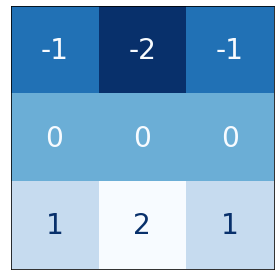

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image = circle([64, 64], val=1.0, r_shrink=3)
image = tf.reshape(image, [*image.shape, 1])
# Bottom sobel
kernel = tf.constant(
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]],
)

show_kernel(kernel)

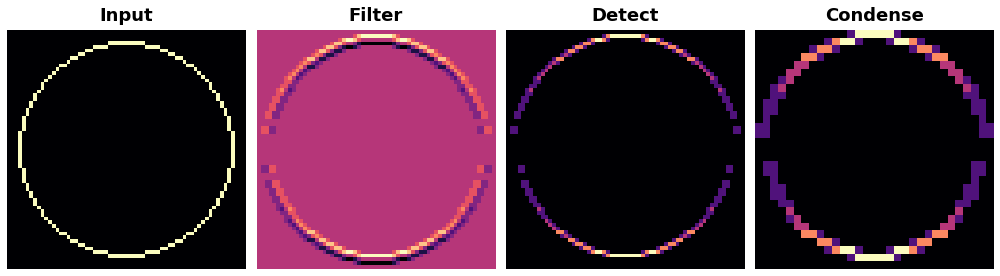

In [4]:
show_extraction(
    image, kernel,

    # Window parameters
    conv_stride=1,
    pool_size=2,
    pool_stride=2,

    subplot_shape=(1, 4),
    figsize=(14, 6),
)

What would happen if we changed the strides of the convolution to 3

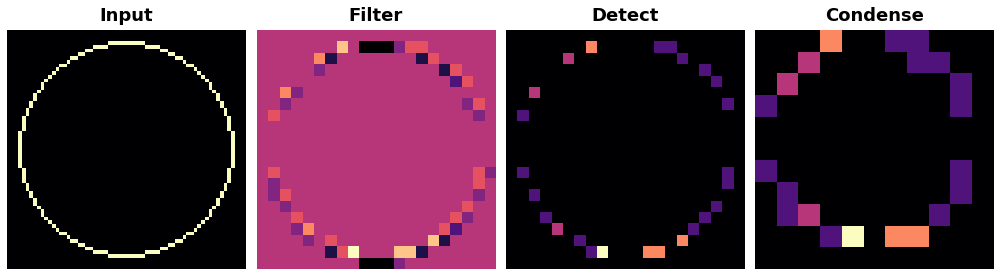

In [5]:
show_extraction(
    image, kernel,

    # Window parameters
    conv_stride=3,
    pool_size=2,
    pool_stride=2,

    subplot_shape=(1, 4),
    figsize=(14, 6),    
)

Sometimes, a model will use a convolution with a larger stride in it's initial layer. This will usually be coupled with a larger kernel as well. The ResNet50 model, for instance, uses  7×7
  kernels with strides of 2 in its first layer. This seems to accelerate the production of large-scale features without the sacrifice of too much information from the input

exercise


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import computervision.visiontools as visiontools


plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

ModuleNotFoundError: ignored

In [8]:
# YOUR CODE HERE: choose an image
image = circle_64

# YOUR CODE HERE: choose a kernel
kernel = bottom_sobel

visiontools.show_extraction(
    image, kernel,

    # YOUR CODE HERE: set parameters
    conv_stride=1,
    conv_padding='valid',
    pool_size=2,
    pool_stride=2,
    pool_padding='same',
    
    subplot_shape=(1, 4),
    figsize=(14, 6),
)

NameError: ignored

In [ ]:
#2nd example same program
# YOUR CODE HERE: choose an image
image = kaggle_k

# YOUR CODE HERE: choose a kernel
kernel = emboss

visiontools.show_extraction(
    image, kernel,

    # YOUR CODE HERE: set parameters
    conv_stride=1,
    conv_padding='valid',
    pool_size=2,
    pool_stride=2,
    pool_padding='same',
    
    subplot_shape=(2, 6),
    figsize=(14, 6),
)

The Receptive Field
Trace back all the connections from some neuron and eventually you reach the input image. All of the input pixels a neuron is connected to is that neuron's receptive field. The receptive field just tells you which parts of the input image a neuron receives information from.

Convolutional networks turn out to be useful not only (two-dimensional) images, but also on things like time-series (one-dimensional) and video (three-dimensional).

In [13]:
import pandas as pd

# Load the time series as a Pandas dataframe
machinelearning = pd.read_csv(
    'C:\Users\Admin\OneDrive - ACU\Desktop\machinelearning.csv',encoding='utf-8'   
     parse_dates=['Week'],
    index_col='Week',
)

machinelearning.plot();

SyntaxError: ignored

What about the kernels? Images are two-dimensional and so our kernels were 2D arrays. A time-series is one-dimensional, so what should the kernel be? A 1D array! Here are some kernels sometimes used on time-series data:

In [ ]:
detrend = tf.constant([-1, 1], dtype=tf.float32)

average = tf.constant([0.2, 0.2, 0.2, 0.2, 0.2], dtype=tf.float32)

spencer = tf.constant([-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 32, 3, -5, -6, -3], dtype=tf.float32) / 320

Can you guess what kind of features these kernels extract? Uncomment one of the kernels below and run the cell to see!

In [ ]:
# UNCOMMENT ONE
kernel = detrend
# kernel = average
# kernel = spencer

# Reformat for TensorFlow
ts_data = machinelearning.to_numpy()
ts_data = tf.expand_dims(ts_data, axis=0)
ts_data = tf.cast(ts_data, dtype=tf.float32)
kern = tf.reshape(kernel, shape=(*kernel.shape, 1, 1))

ts_filter = tf.nn.conv1d(
    input=ts_data,
    filters=kern,
    stride=1,
    padding='VALID',
)

# Format as Pandas Series
machinelearning_filtered = pd.Series(tf.squeeze(ts_filter).numpy())

machinelearning_filtered.plot();